In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import models, optimizers, regularizers

In [2]:
model = models.Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()


2022-06-06 12:21:15.073840: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [3]:
train_data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [4]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [5]:
train_generator= train_data_generator.flow_from_directory('../input/cnn-data-sources/cats_and_dogs/train',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary')

validation_generator= test_datagen.flow_from_directory('../input/cnn-data-sources/cats_and_dogs/validation',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
checkpoint = ModelCheckpoint('modelo_perro_gato.hdf5', monitor='val_accuracy', 
                             verbose = 1, save_best_only=True)

In [7]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(),
              metrics=['accuracy'])

In [8]:
hist = model.fit(train_generator, steps_per_epoch=2000//32,
                epochs=100,
                validation_data=validation_generator,
                validation_steps= 1000//32,
                callbacks=[checkpoint])

2022-06-06 12:21:16.864494: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
62/62 [==============================] - 61s 965ms/step - loss: 0.6971 - accuracy: 0.5117 - val_loss: 0.6897 - val_accuracy: 0.4990

Epoch 00001: val_accuracy improved from -inf to 0.49899, saving model to modelo_perro_gato.hdf5
Epoch 2/100
62/62 [==============================] - 50s 804ms/step - loss: 0.6941 - accuracy: 0.4898 - val_loss: 0.6930 - val_accuracy: 0.4980

Epoch 00002: val_accuracy did not improve from 0.49899
Epoch 3/100
62/62 [==============================] - 50s 805ms/step - loss: 0.6929 - accuracy: 0.4949 - val_loss: 0.6920 - val_accuracy: 0.5010

Epoch 00003: val_accuracy improved from 0.49899 to 0.50101, saving model to modelo_perro_gato.hdf5
Epoch 4/100
62/62 [==============================] - 50s 807ms/step - loss: 0.6923 - accuracy: 0.5101 - val_loss: 0.6887 - val_accuracy: 0.5000

Epoch 00004: val_accuracy did not improve from 0.50101
Epoch 5/100
62/62 [==============================] - 50s 803ms/step - loss: 0.6894 - accuracy: 0.5269 - val_loss: 0

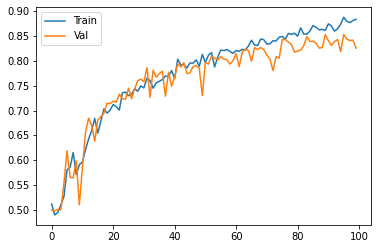

In [9]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'], label='Train')
plt.plot(hist.history['val_accuracy'], label='Val')
plt.legend()
plt.show()

In [10]:
test_generator= test_datagen.flow_from_directory('../input/cnn-data-sources/cats_and_dogs/validation',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [11]:
model2 =model

In [12]:
model2.load_weights('./modelo_perro_gato.hdf5')

In [13]:
model2.evaluate(test_generator)

32/32 [==============================] - 7s 210ms/step - loss: 0.4040 - accuracy: 0.8540


[0.4040195941925049, 0.8539999723434448]